In [1]:
# https://www.youtube.com/watch?v=mMMzDFttZ8A   by Able Programming
# https://www.youtube.com/watch?v=SL-kq73uIYs   by ウマたん

# Sprint 機械学習スクラッチ ロジスティック回帰

## 1.このSprintについて

Sprintの目的
- スクラッチを通してロジスティック回帰を理解する
- 分類問題についての基礎を学ぶ

**どのように学ぶか**

スクラッチでロジスティック回帰を実装した後、学習と検証を行なっていきます。



## 2.ロジスティック回帰スクラッチ

ロジスティック回帰のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。


以下に雛形を用意してあります。このScratchLogisticRegressionクラスにコードを書き加えていってください。推定関係のメソッドは線形回帰と異なり、ラベルを出力するpredictメソッドと、確率を出力するpredict_probaメソッドの2種類を作成します。


**雛形**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from numpy.random import *

In [3]:
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    def __init__(self, num_iter=100, lr=0.01, C =1, random_state =None, no_bias=True, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        self.C = C
        self.lamda = 1/self.C
        self.random_state = random_state
        
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
        
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
       # yのラベル値を取得
       #np.uniqueはyの中での種類を抽出している　例　０００１１１１２２２→０，１，２
        self.ylabel = np.unique(y)
        
        # yのラベル値を0,1に置換 2値分類だからこの書き方をしてもOK
        #こうしておかないと、errorの値がぶれてしまう(?)
        y = np.where(y==self.ylabel[0],0,1)
        
        #boolっていうのは、真偽値のこと(TrueとFalse)
        if y_val is not None:
            y_val = np.where(y_val==self.ylabel[0],0,1)
        
        # 線形結合　bias項と結合してる
        X = self._linear_combination(X)
        #print(X)
        
        # パラメータθの初期値を乱数で与える
        np.random.seed(self.random_state)
        self.theta = np.random.rand(X.shape[1])
        
        for i in range(self.iter):
            # 予測確率 問題１でやったことをしている(仮定関数)
            yhat = self._hypothetical_function(X)
            
            # 誤差
            error = yhat - y
            self.loss[i] = self._loss_function(y,yhat)
            
            if X_val is not None:
                val_X = self._linear_combination(X_val)
                val_yhat = self._hypothetical_function(val_X)
                self.val_loss[i] = self._loss_function(y_val,val_yhat)
            
            self._gradient_descent(X, error)
            
            # θを保存
            np.save('theta', self.theta)
            
            # verboseをTrueにした際は学習過程を出力
            if self.verbose:
                print('n_iter:', i, 'loss:', self.loss[i], 'theta:', self.theta)
            
        
    
    def _linear_combination(self,X):
        """
        線形結合する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
          次の形のndarray, shape (n_samples, n_features+1)
          線形結合
        """
        # X（バイアス項）の作成
        if self.no_bias == False:
            x0 = np.ones(X.shape[0])
            return np.concatenate([x0.reshape(-1,1),X],axis=1)
        
        return X
           
    def _hypothetical_function(self,X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        z = np.dot(X,self.theta)
        
        return 1/(1+np.exp(-z))

    
    def _loss_function(self, y, yhat):
        """
        ロジスティック回帰の損失関数を計算する。
        Parameters
        ----------
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        yhat : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        
        return np.sum(-y*np.log(yhat) -(1-y)*np.log(1-yhat))/len(y)+(0.5*self.lamda/len(y)*np.sum(self.theta**2))
    
    
    def _gradient_descent(self, X, error):#j=0の時の考え方が分からない
        """
        最急降下法により、θの値を更新し、学習する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        error : 真の値と推定した値の誤差
        """
        if self.no_bias ==False:
            self.theta[0] -=  self.lr*np.dot(X[:, 0].reshape(-1, 1).T, error)/len(X)
            self.theta[1:] -=  self.lr*(np.dot(X[:, 1:].T, error) + (self.lamda*self.theta[1:]))/len(X)
        
        else:
            self.theta -=  self.lr*(np.dot(error,X) + (self.lamda*self.theta))/len(X)
            
            return self.theta
      
    
    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        X = self._linear_combination(X)
        yhat = self._hypothetical_function(X)
        
        return np.where(yhat<0.5,self.ylabel[0],self.ylabel[1])
    
    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        X = self._linear_combination(X)
        
        return self._hypothetical_function(X)

## 【問題1】仮定関数
ロジスティック回帰の仮定関数のメソッドをScratchLogisticRegressionクラスに実装してください。


ロジスティック回帰の仮定関数は、線形回帰の仮定関数を シグモイド関数 に通したものです。シグモイド関数は以下の式で表されます。

$$
g(z)=\frac{1}{1+e^{−z}}.
$$

線形回帰の仮定関数は次の式でした。

$$
h_θ(x)=θ^T⋅x.
$$

まとめて書くと、ロジスティック回帰の仮定関数は次のようになります。

$$
h_θ(x)=\frac{1}{1+e^{-θ^T⋅x}}.
$$

$x$ : 特徴量ベクトル


$\theta$ : パラメータ（重み）ベクトル



In [4]:
#仮定関数
x1 = np.arange(1, 11, 1).reshape(-1, 1)
x0 = np.ones([x1.shape[0]]).reshape(-1, 1)
X = np.concatenate([x0, x1], axis=1)

print('X:\n',X)

X:
 [[ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]]


In [5]:
#パラメータθ
theta = np.random.randn(X.shape[1])
print('theta:\n', theta)

theta:
 [ 1.73368164 -0.06695581]


In [6]:
z = np.dot(X, theta)
print('z:\n', z)

z:
 [1.66672584 1.59977003 1.53281422 1.46585841 1.3989026  1.3319468
 1.26499099 1.19803518 1.13107937 1.06412356]


In [7]:
#シグモイド関数にzを代入・・・出力　0<y<1
y = 1/(1+np.exp(-z))
print('y:\n', y)

y:
 [0.8411388  0.83198624 0.8224177  0.81242707 0.80200969 0.79116248
 0.77988408 0.76817507 0.75603804 0.74347777]


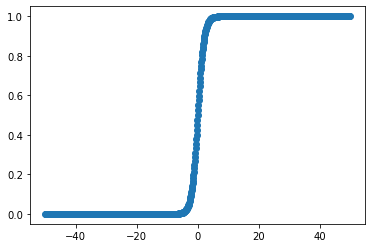

In [8]:
z1 = np.arange(-50, 50, 0.1)
y1 = 1/(1+np.exp(-z1))
plt.scatter(z1, y1)
plt.plot();

## 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。

$$
\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}\\
$$

$$
\frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^{m}(h_θ(x^{(i)}) − y^{(i)})x_j^{(i)} ,j = 0\\
$$

$$
\frac{\partial J(\theta)}{\partial \theta_j} = \biggl(\frac{1}{m} \sum_{i=1}^{m}(h_θ(x^{(i)}) − y^{(i)})x_j^{(i)} \biggr) + \frac{λ}{m}\theta_j　 ,j\geq 1
$$

$i$ : サンプルのインデックス


$j$ : 特徴量のインデックス


$m$ : 入力されるデータの数


$h_\theta()$ : 仮定関数


$x$ : 特徴量ベクトル


$\theta$ : パラメータ（重み）ベクトル


$x^{(i)}$ : i番目のサンプルの特徴量ベクトル


$y^{(i)}$ : i番目のサンプルの正解ラベル


$\theta_j$ : j番目のパラメータ（重み）


$λ$ : 正則化パラメータ



In [9]:
#パラメータ更新の実装前確認 予測値ラベル変換
x1 = np.array([2, 1, 5, 6, 4]).reshape(-1, 1)
x0 = np.ones(x1.shape[0]).reshape(-1, 1)
x = np.concatenate([x0, x1],axis=1)

print('x:\n', x)

x:
 [[1. 2.]
 [1. 1.]
 [1. 5.]
 [1. 6.]
 [1. 4.]]


In [10]:
#np.whereは左端で条件指定したものを満たすものを真ん中の値、満たさないものを右端に置き換える
#ロジスティック回帰における実測値や予測値は0〜１に収まる(確率を出すから)

y = np.array([0.4,0.5,0.2,0.1,0.9])
y_hat = np.where(y<0.5,0,1)
y_test = np.array([1,1,0,0,1])

print('y:\n',y)
print('y_hat:\n',y_hat)
print('y_test:\n',y_test)

y:
 [0.4 0.5 0.2 0.1 0.9]
y_hat:
 [0 1 0 0 1]
y_test:
 [1 1 0 0 1]


In [11]:
# パラメータ　θ
theta = np.random.randn(x.shape[1])
print('theta:\n',theta)

theta:
 [-0.70601628  0.01561629]


In [12]:
# y_hat,yの誤差
error = y_hat - y_test
print('error:\n',error)

error:
 [-1  0  0  0  0]


In [13]:
# lamda = lm
# https://qiita.com/kenta1984/items/91ab29fae8cd3920cf2b 正則化とは
lm = np.array([0,1])
theta*lm

array([-0.        ,  0.01561629])

In [14]:
# パラメータの更新
0.01*np.dot(error,x)/len(x) + theta*lm/len(x)

array([-0.002     , -0.00087674])

In [15]:
#下の計算がいつも分かりづらいので、ここに例を書いておく
a =1
a -= 3
a

-2

In [16]:
#j =0　はバイアス項ということ
0.01*np.dot(error,x)/len(x)

array([-0.002, -0.004])

In [17]:
#j >= 1(バイアス項以外の部分)
theta -=  (0.01*np.dot(error,x)/len(x) + theta*lm/len(x))
print('theta:\n',theta)

theta:
 [-0.70401628  0.01649303]


## 【問題3】推定
推定する仕組みを実装してください。ScratchLogisticRegressionクラスの雛形に含まれるpredictメソッドとpredict_probaメソッドに書き加えてください。


仮定関数 hθ(x)の出力がpredict_probaの返り値、さらにその値に閾値を設けて1と0のラベルとしたものがpredictの返り値となります。

In [18]:
x1 = np.array([2,1,5,6,4]).reshape(-1,1)
x2 = np.array([2,1,5,2,4]).reshape(-1,1)
y = np.array([1,0,0,0,1])
print('x1:\n',x1)
print('x1:\n',x2)
print('y:\n',y)

x1:
 [[2]
 [1]
 [5]
 [6]
 [4]]
x1:
 [[2]
 [1]
 [5]
 [2]
 [4]]
y:
 [1 0 0 0 1]


In [19]:
clf = ScratchLogisticRegression()
clf.fit(x1,y,x2,y)

y_proba = clf.predict_proba(x1)
y_pred = clf.predict(x2)

In [20]:
print('y_proba:\n',y_proba)
print('y_pred:\n',y_pred)

y_proba:
 [0.43487251 0.46729695 0.34186455 0.31302918 0.37191809]
y_pred:
 [0 0 0 0 0]


## 【問題4】目的関数
以下の数式で表されるロジスティック回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。


なお、この数式には正則化項が含まれています。


＊数式が見切れる場合、DIVERを全画面にして御覧ください。

$$
J(\theta)= \frac{1}{m} \sum_{i=1}^{m}[−y^{(i)} log(h_θ(x^{(i)})) − (1−y^{(i)}) log(1−h_θ(x^{(i)}))] + \frac{λ}{2m}\sum_{j=1}^n θ^2_j.
$$


$m$ : 入力されるデータの数


$h_\theta()$ : 仮定関数


$x$ : 特徴量ベクトル


$\theta$ : パラメータ（重み）ベクトル


$x^{(i)}$ : i番目のサンプルの特徴量ベクトル


$y^{(i)}$ : i番目のサンプルの正解ラベル


$\theta_j$ : j番目のパラメータ（重み）


$n$ : 特徴量の数


$λ$ : 正則化パラメータ

In [21]:
# チェックデータ作成
y1 = np.ones(99)
y2 = np.zeros(99)
yh = np.arange(0.01,1.0,0.01)

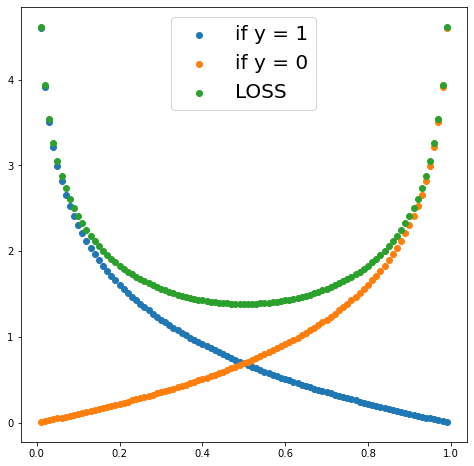

In [22]:
# チェックデータで目的関数Jをイメージしてみる
J1 = -y1*np.log(yh)-(1-y1)*np.log(1-yh)
J2 = -y2*np.log(yh)-(1-y2)*np.log(1-yh)
J = -y1*np.log(yh)-(1-y2)*np.log(1-yh)

# 学習曲線のプロット
fig,ax = plt.subplots(figsize=(8,8))

plt.rcParams["font.size"] = 20
plt.scatter(yh,J1,label='if y = 1')
plt.scatter(yh,J2,label='if y = 0')
plt.scatter(yh,J,label='LOSS')
plt.legend();

## 【問題5】学習と推定
機械学習スクラッチ入門のSprintで用意したirisデータセットのvirgicolorとvirginicaの2値分類に対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。


AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

In [23]:
from sklearn.datasets import load_iris
data = load_iris().data
target = load_iris().target.reshape(-1,1)

In [24]:
import pandas as pd

iris = np.concatenate([data,target],axis=1)
iris = pd.DataFrame(iris)
iris.shape

(150, 5)

In [25]:
disp = False
if disp == True:
    sns.pairplot(iris,palette='tab10');

In [26]:
iris_X = iris.loc[iris[4]!=0,2:3].values
iris_y = iris.loc[iris[4]!=0,4].values
print('iris_X.shape:',iris_X.shape)
print('iris_y.shape:',iris_y.shape)

iris_X.shape: (100, 2)
iris_y.shape: (100,)


In [27]:
# Irisデータセットで学習、推定
from sklearn.model_selection import train_test_split
X = iris_X
y = iris_y

X_train, X_valid, y_train, y_valid = \
train_test_split(X,y,train_size=0.75,random_state=0)

print('X_train.shape:',X_train.shape)
print('y_train.shape:',y_train.shape)
print('X_valid.shape:',X_valid.shape)
print('y_valid.shape:',y_valid.shape)

X_train.shape: (75, 2)
y_train.shape: (75,)
X_valid.shape: (25, 2)
y_valid.shape: (25,)


In [28]:
# yのユニーク値
np.unique(y)

array([1., 2.])

In [29]:
# 標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_valid_std = scaler.transform(X_valid)

In [30]:
clf = ScratchLogisticRegression(num_iter=2000, lr=0.01, C=0.7, no_bias = False ,verbose=True)
clf.fit(X_train_std,y_train, X_valid_std,y_valid)

y_pred = clf.predict(X_valid_std)
y_prob = clf.predict_proba(X_valid_std)

n_iter: 0 loss: 0.5348938091376458 theta: [0.73552979 0.13416976 0.55075287]
n_iter: 1 loss: 0.5332049914813222 theta: [0.7339948  0.13691595 0.55333744]
n_iter: 2 loss: 0.5315288700083931 theta: [0.73246512 0.13965182 0.55591189]
n_iter: 3 loss: 0.5298653362081085 theta: [0.73094073 0.14237742 0.55847629]
n_iter: 4 loss: 0.5282142823674436 theta: [0.72942162 0.14509282 0.56103069]
n_iter: 5 loss: 0.526575601571265 theta: [0.72790778 0.14779807 0.56357513]
n_iter: 6 loss: 0.5249491877023041 theta: [0.72639919 0.15049321 0.56610967]
n_iter: 7 loss: 0.5233349354409441 theta: [0.72489584 0.15317831 0.56863437]
n_iter: 8 loss: 0.5217327402648225 theta: [0.72339771 0.15585341 0.57114926]
n_iter: 9 loss: 0.5201424984482569 theta: [0.72190479 0.15851857 0.57365441]
n_iter: 10 loss: 0.5185641070614936 theta: [0.72041707 0.16117384 0.57614985]
n_iter: 11 loss: 0.5169974639697895 theta: [0.71893453 0.16381927 0.57863566]
n_iter: 12 loss: 0.5154424678323262 theta: [0.71745715 0.16645491 0.5811118

n_iter: 114 loss: 0.40305198442284107 theta: [0.59090855 0.39232739 0.79145384]
n_iter: 115 loss: 0.4022867738697045 theta: [0.5898748  0.3941927  0.79317192]
n_iter: 116 loss: 0.4015263393729376 theta: [0.58884451 0.39605243 0.79488449]
n_iter: 117 loss: 0.4007706421070422 theta: [0.58781767 0.3979066  0.79659156]
n_iter: 118 loss: 0.40001964361518705 theta: [0.58679426 0.39975525 0.79829317]
n_iter: 119 loss: 0.39927330580555814 theta: [0.58577427 0.40159841 0.79998935]
n_iter: 120 loss: 0.39853159094774027 theta: [0.58475769 0.40343609 0.80168012]
n_iter: 121 loss: 0.3977944616691285 theta: [0.5837445  0.40526834 0.80336551]
n_iter: 122 loss: 0.39706188095136985 theta: [0.58273469 0.40709517 0.80504556]
n_iter: 123 loss: 0.39633381212683483 theta: [0.58172824 0.40891663 0.80672027]
n_iter: 124 loss: 0.3956102188751208 theta: [0.58072513 0.41073272 0.8083897 ]
n_iter: 125 loss: 0.3948910652195833 theta: [0.57972536 0.41254349 0.81005385]
n_iter: 126 loss: 0.39417631552389937 theta: [

n_iter: 220 loss: 0.34253948297549797 theta: [0.49806378 0.56375731 0.94753467]
n_iter: 221 loss: 0.34212038017554 theta: [0.49732668 0.5651614  0.94879569]
n_iter: 222 loss: 0.34170342577679313 theta: [0.49659181 0.56656213 0.95005338]
n_iter: 223 loss: 0.3412886050052187 theta: [0.49585915 0.56795953 0.95130776]
n_iter: 224 loss: 0.3408759032125479 theta: [0.4951287  0.5693536  0.95255883]
n_iter: 225 loss: 0.3404653058750418 theta: [0.49440045 0.57074437 0.95380663]
n_iter: 226 loss: 0.34005679859226273 theta: [0.49367439 0.57213185 0.95505115]
n_iter: 227 loss: 0.3396503670858595 theta: [0.49295051 0.57351604 0.95629241]
n_iter: 228 loss: 0.3392459971983663 theta: [0.4922288  0.57489698 0.95753043]
n_iter: 229 loss: 0.3388436748920134 theta: [0.49150926 0.57627466 0.95876523]
n_iter: 230 loss: 0.3384433862475522 theta: [0.49079188 0.57764911 0.95999681]
n_iter: 231 loss: 0.33804511746309124 theta: [0.49007664 0.57902033 0.96122518]
n_iter: 232 loss: 0.3376488548529458 theta: [0.489

n_iter: 337 loss: 0.30500026115291995 theta: [0.42490791 0.70854384 1.07570574]
n_iter: 338 loss: 0.30475762704085524 theta: [0.42438089 0.70963622 1.07665701]
n_iter: 339 loss: 0.304516022021758 theta: [0.4238553  0.71072648 1.07760618]
n_iter: 340 loss: 0.3042754402192778 theta: [0.42333114 0.71181466 1.07855328]
n_iter: 341 loss: 0.30403587579938995 theta: [0.4228084  0.71290074 1.07949829]
n_iter: 342 loss: 0.303797322970031 theta: [0.42228708 0.71398474 1.08044124]
n_iter: 343 loss: 0.30355977598073774 theta: [0.42176718 0.71506666 1.08138213]
n_iter: 344 loss: 0.30332322912228954 theta: [0.42124868 0.71614652 1.08232096]
n_iter: 345 loss: 0.3030876767263547 theta: [0.42073159 0.71722431 1.08325775]
n_iter: 346 loss: 0.3028531131651397 theta: [0.4202159  0.71830005 1.08419249]
n_iter: 347 loss: 0.30261953285104226 theta: [0.4197016  0.71937375 1.08512521]
n_iter: 348 loss: 0.30238693023630764 theta: [0.41918869 0.72044541 1.0860559 ]
n_iter: 349 loss: 0.30215529981268857 theta: [0

n_iter: 457 loss: 0.2818709266210747 theta: [0.3706556  0.8264303  1.17675997]
n_iter: 458 loss: 0.28171928405509045 theta: [0.37027026 0.82731451 1.1775048 ]
n_iter: 459 loss: 0.2815681887112992 theta: [0.36988588 0.8281973  1.17824822]
n_iter: 460 loss: 0.28141763794806446 theta: [0.36950245 0.82907867 1.17899024]
n_iter: 461 loss: 0.2812676291399095 theta: [0.36911999 0.82995863 1.17973086]
n_iter: 462 loss: 0.28111815967739745 theta: [0.36873849 0.83083717 1.18047008]
n_iter: 463 loss: 0.28096922696701254 theta: [0.36835793 0.8317143  1.18120792]
n_iter: 464 loss: 0.2808208284310434 theta: [0.36797833 0.83259003 1.18194436]
n_iter: 465 loss: 0.280672961507466 theta: [0.36759967 0.83346437 1.18267942]
n_iter: 466 loss: 0.2805256236498283 theta: [0.36722196 0.8343373  1.1834131 ]
n_iter: 467 loss: 0.280378812327136 theta: [0.36684519 0.83520885 1.1841454 ]
n_iter: 468 loss: 0.28023252502373863 theta: [0.36646936 0.836079   1.18487633]
n_iter: 469 loss: 0.2800867592392175 theta: [0.36

n_iter: 570 loss: 0.2676691701331021 theta: [0.33258754 0.91821124 1.25289572]
n_iter: 571 loss: 0.26756578418391275 theta: [0.33229481 0.91895735 1.25350438]
n_iter: 572 loss: 0.26746272667964416 theta: [0.33200278 0.91970242 1.25411202]
n_iter: 573 loss: 0.26735999623738976 theta: [0.33171143 0.92044644 1.25471864]
n_iter: 574 loss: 0.26725759148161543 theta: [0.33142077 0.92118942 1.25532423]
n_iter: 575 loss: 0.2671555110441132 theta: [0.3311308  0.92193136 1.2559288 ]
n_iter: 576 loss: 0.26705375356395217 theta: [0.33084151 0.92267227 1.25653235]
n_iter: 577 loss: 0.26695231768743277 theta: [0.33055291 0.92341214 1.2571349 ]
n_iter: 578 loss: 0.26685120206803953 theta: [0.33026498 0.92415098 1.25773643]
n_iter: 579 loss: 0.2667504053663955 theta: [0.32997774 0.9248888  1.25833695]
n_iter: 580 loss: 0.2666499262502153 theta: [0.32969117 0.92562559 1.25893646]
n_iter: 581 loss: 0.2665497633942605 theta: [0.32940527 0.92636135 1.25953497]
n_iter: 582 loss: 0.26644991548029384 theta: 

n_iter: 685 loss: 0.25763584364709236 theta: [0.30302747 0.99774514 1.31675354]
n_iter: 686 loss: 0.2575627024485617 theta: [0.30280321 0.99838605 1.31725935]
n_iter: 687 loss: 0.2574897693070944 theta: [0.30257946 0.99902616 1.31776438]
n_iter: 688 loss: 0.2574170434465758 theta: [0.30235621 0.99966548 1.31826864]
n_iter: 689 loss: 0.2573445240945463 theta: [0.30213347 1.000304   1.31877212]
n_iter: 690 loss: 0.25727221048217996 theta: [0.30191124 1.00094172 1.31927483]
n_iter: 691 loss: 0.2572001018442643 theta: [0.30168951 1.00157866 1.31977678]
n_iter: 692 loss: 0.25712819741917925 theta: [0.30146828 1.00221481 1.32027795]
n_iter: 693 loss: 0.25705649644887685 theta: [0.30124756 1.00285016 1.32077836]
n_iter: 694 loss: 0.2569849981788608 theta: [0.30102733 1.00348474 1.321278  ]
n_iter: 695 loss: 0.25691370185816637 theta: [0.3008076  1.00411852 1.32177689]
n_iter: 696 loss: 0.2568426067393403 theta: [0.30058838 1.00475153 1.32227501]
n_iter: 697 loss: 0.25677171207842053 theta: [0

n_iter: 806 loss: 0.2501001209304753 theta: [0.27924739 1.06995682 1.37278275]
n_iter: 807 loss: 0.2500474192931411 theta: [0.2790764  1.07051231 1.37320594]
n_iter: 808 loss: 0.2499948533276778 theta: [0.27890579 1.07106718 1.37362854]
n_iter: 809 loss: 0.24994242258130567 theta: [0.27873556 1.07162143 1.37405053]
n_iter: 810 loss: 0.2498901266031438 theta: [0.27856571 1.07217506 1.37447193]
n_iter: 811 loss: 0.24983796494420105 theta: [0.27839623 1.07272806 1.37489273]
n_iter: 812 loss: 0.24978593715736574 theta: [0.27822712 1.07328045 1.37531294]
n_iter: 813 loss: 0.24973404279739686 theta: [0.27805839 1.07383223 1.37573256]
n_iter: 814 loss: 0.24968228142091392 theta: [0.27789003 1.07438338 1.37615158]
n_iter: 815 loss: 0.24963065258638803 theta: [0.27772205 1.07493392 1.37657001]
n_iter: 816 loss: 0.2495791558541321 theta: [0.27755444 1.07548385 1.37698786]
n_iter: 817 loss: 0.24952779078629164 theta: [0.27738719 1.07603317 1.37740512]
n_iter: 818 loss: 0.24947655694683565 theta: 

n_iter: 918 loss: 0.244948299984996 theta: [0.26226132 1.1285508  1.41671372]
n_iter: 919 loss: 0.2449083588418641 theta: [0.26212773 1.12904321 1.41707664]
n_iter: 920 loss: 0.24486851257369896 theta: [0.26199442 1.1295351  1.41743908]
n_iter: 921 loss: 0.24482876089141814 theta: [0.26186141 1.13002649 1.41780104]
n_iter: 922 loss: 0.244789103507041 theta: [0.2617287  1.13051737 1.41816252]
n_iter: 923 loss: 0.24474954013368355 theta: [0.26159627 1.13100775 1.41852352]
n_iter: 924 loss: 0.2447100704855536 theta: [0.26146413 1.13149762 1.41888404]
n_iter: 925 loss: 0.24467069427794533 theta: [0.26133228 1.13198699 1.41924408]
n_iter: 926 loss: 0.24463141122723472 theta: [0.26120073 1.13247585 1.41960364]
n_iter: 927 loss: 0.2445922210508744 theta: [0.26106946 1.13296421 1.41996273]
n_iter: 928 loss: 0.2445531234673884 theta: [0.26093847 1.13345207 1.42032134]
n_iter: 929 loss: 0.24451411819636784 theta: [0.26080778 1.13393943 1.42067948]
n_iter: 930 loss: 0.2444752049584656 theta: [0.2

n_iter: 1022 loss: 0.24125456516008958 theta: [0.24982596 1.17718725 1.45202521]
n_iter: 1023 loss: 0.24122312223582523 theta: [0.24971965 1.17763108 1.45234232]
n_iter: 1024 loss: 0.24119174920946362 theta: [0.24961358 1.17807448 1.45265903]
n_iter: 1025 loss: 0.24116044588359647 theta: [0.24950774 1.17851746 1.45297533]
n_iter: 1026 loss: 0.24112921206150928 theta: [0.24940213 1.17896    1.45329124]
n_iter: 1027 loss: 0.24109804754717895 theta: [0.24929676 1.17940212 1.45360674]
n_iter: 1028 loss: 0.24106695214527052 theta: [0.24919161 1.17984382 1.45392185]
n_iter: 1029 loss: 0.2410359256611343 theta: [0.2490867  1.18028509 1.45423656]
n_iter: 1030 loss: 0.24100496790080306 theta: [0.24898202 1.18072593 1.45455087]
n_iter: 1031 loss: 0.24097407867098897 theta: [0.24887757 1.18116636 1.45486479]
n_iter: 1032 loss: 0.24094325777908093 theta: [0.24877335 1.18160635 1.45517831]
n_iter: 1033 loss: 0.24091250503314152 theta: [0.24866936 1.18204593 1.45549143]
n_iter: 1034 loss: 0.24088182

n_iter: 1154 loss: 0.2376420366426758 theta: [0.23764436 1.23230293 1.49064979]
n_iter: 1155 loss: 0.23761834190522915 theta: [0.23756508 1.23269548 1.49091925]
n_iter: 1156 loss: 0.23759469605841804 theta: [0.23748598 1.23308768 1.49118838]
n_iter: 1157 loss: 0.23757109897558873 theta: [0.23740705 1.23347953 1.49145719]
n_iter: 1158 loss: 0.2375475505304936 theta: [0.2373283  1.23387103 1.49172567]
n_iter: 1159 loss: 0.2375240505972892 theta: [0.23724973 1.23426218 1.49199384]
n_iter: 1160 loss: 0.23750059905053497 theta: [0.23717133 1.23465298 1.49226168]
n_iter: 1161 loss: 0.23747719576519166 theta: [0.23709311 1.23504343 1.4925292 ]
n_iter: 1162 loss: 0.23745384061661967 theta: [0.23701507 1.23543353 1.4927964 ]
n_iter: 1163 loss: 0.23743053348057747 theta: [0.2369372  1.23582328 1.49306328]
n_iter: 1164 loss: 0.2374072742332204 theta: [0.23685951 1.23621269 1.49332984]
n_iter: 1165 loss: 0.2373840627510987 theta: [0.23678199 1.23660174 1.49359607]
n_iter: 1166 loss: 0.237360898911

n_iter: 1272 loss: 0.23515260597281126 theta: [0.22942896 1.27632158 1.52033625]
n_iter: 1273 loss: 0.23513390348298088 theta: [0.22936843 1.27667581 1.52057069]
n_iter: 1274 loss: 0.23511523737078188 theta: [0.22930804 1.27702974 1.52080486]
n_iter: 1275 loss: 0.235096607548279 theta: [0.22924779 1.27738337 1.52103876]
n_iter: 1276 loss: 0.23507801392779826 theta: [0.22918768 1.2777367  1.52127239]
n_iter: 1277 loss: 0.23505945642192655 theta: [0.22912771 1.27808974 1.52150575]
n_iter: 1278 loss: 0.23504093494351017 theta: [0.22906788 1.27844247 1.52173884]
n_iter: 1279 loss: 0.23502244940565425 theta: [0.22900819 1.27879491 1.52197166]
n_iter: 1280 loss: 0.23500399972172153 theta: [0.22894864 1.27914705 1.52220421]
n_iter: 1281 loss: 0.2349855858053318 theta: [0.22888923 1.2794989  1.5224365 ]
n_iter: 1282 loss: 0.23496720757036063 theta: [0.22882995 1.27985044 1.52266851]
n_iter: 1283 loss: 0.2349488649309388 theta: [0.22877082 1.28020169 1.52290026]
n_iter: 1284 loss: 0.23493055780

n_iter: 1399 loss: 0.23304161507181953 theta: [0.22278419 1.31903564 1.54806354]
n_iter: 1400 loss: 0.23302690738613852 theta: [0.22273956 1.31935473 1.54826643]
n_iter: 1401 loss: 0.23301222672687374 theta: [0.22269504 1.31967357 1.5484691 ]
n_iter: 1402 loss: 0.2329975730329514 theta: [0.22265063 1.31999215 1.54867155]
n_iter: 1403 loss: 0.2329829462434661 theta: [0.22260634 1.32031048 1.54887377]
n_iter: 1404 loss: 0.23296834629768096 theta: [0.22256215 1.32062855 1.54907576]
n_iter: 1405 loss: 0.23295377313502652 theta: [0.22251807 1.32094637 1.54927752]
n_iter: 1406 loss: 0.23293922669510028 theta: [0.2224741  1.32126393 1.54947906]
n_iter: 1407 loss: 0.23292470691766654 theta: [0.22243024 1.32158125 1.54968038]
n_iter: 1408 loss: 0.23291021374265525 theta: [0.22238648 1.3218983  1.54988147]
n_iter: 1409 loss: 0.2328957471101618 theta: [0.22234284 1.32221511 1.55008233]
n_iter: 1410 loss: 0.2328813069604467 theta: [0.22229931 1.32253166 1.55028298]
n_iter: 1411 loss: 0.23286689323

n_iter: 1507 loss: 0.23159772082233027 theta: [0.21856233 1.35208289 1.56872519]
n_iter: 1508 loss: 0.23158561077869058 theta: [0.21852851 1.35237609 1.56890525]
n_iter: 1509 loss: 0.2315735220368616 theta: [0.21849479 1.35266907 1.56908512]
n_iter: 1510 loss: 0.2315614545511574 theta: [0.21846115 1.35296182 1.56926478]
n_iter: 1511 loss: 0.23154940827601114 theta: [0.2184276  1.35325435 1.56944425]
n_iter: 1512 loss: 0.23153738316597472 theta: [0.21839415 1.35354665 1.56962353]
n_iter: 1513 loss: 0.2315253791757185 theta: [0.21836078 1.35383873 1.56980261]
n_iter: 1514 loss: 0.2315133962600308 theta: [0.2183275  1.35413059 1.56998149]
n_iter: 1515 loss: 0.2315014343738178 theta: [0.21829431 1.35442222 1.57016018]
n_iter: 1516 loss: 0.23148949347210274 theta: [0.21826121 1.35471363 1.57033867]
n_iter: 1517 loss: 0.23147757351002585 theta: [0.2182282  1.35500481 1.57051697]
n_iter: 1518 loss: 0.23146567444284402 theta: [0.21819528 1.35529578 1.57069507]
n_iter: 1519 loss: 0.231453796225

n_iter: 1627 loss: 0.23028469258571505 theta: [0.21510419 1.38572989 1.58899615]
n_iter: 1628 loss: 0.23027484320796607 theta: [0.21508009 1.38599782 1.58915431]
n_iter: 1629 loss: 0.2302650104061681 theta: [0.21505607 1.38626555 1.5893123 ]
n_iter: 1630 loss: 0.23025519414661766 theta: [0.21503212 1.38653309 1.58947012]
n_iter: 1631 loss: 0.2302453943956943 theta: [0.21500824 1.38680043 1.58962777]
n_iter: 1632 loss: 0.23023561111985982 theta: [0.21498443 1.38706757 1.58978526]
n_iter: 1633 loss: 0.23022584428565862 theta: [0.21496069 1.38733452 1.58994258]
n_iter: 1634 loss: 0.23021609385971709 theta: [0.21493703 1.38760127 1.59009973]
n_iter: 1635 loss: 0.23020635980874352 theta: [0.21491343 1.38786782 1.59025671]
n_iter: 1636 loss: 0.23019664209952787 theta: [0.21488991 1.38813418 1.59041352]
n_iter: 1637 loss: 0.23018694069894133 theta: [0.21486646 1.38840034 1.59057017]
n_iter: 1638 loss: 0.23017725557393653 theta: [0.21484308 1.38866631 1.59072664]
n_iter: 1639 loss: 0.230167586

n_iter: 1740 loss: 0.2292692155682769 theta: [0.21280924 1.41480672 1.60584528]
n_iter: 1741 loss: 0.22926104393742716 theta: [0.21279253 1.41505365 1.60598558]
n_iter: 1742 loss: 0.22925288554628906 theta: [0.21277588 1.41530041 1.60612574]
n_iter: 1743 loss: 0.22924474036915846 theta: [0.21275928 1.41554699 1.60626575]
n_iter: 1744 loss: 0.2292366083803913 theta: [0.21274275 1.41579339 1.60640561]
n_iter: 1745 loss: 0.22922848955440325 theta: [0.21272627 1.41603963 1.60654532]
n_iter: 1746 loss: 0.2292203838656695 theta: [0.21270985 1.41628568 1.60668489]
n_iter: 1747 loss: 0.22921229128872497 theta: [0.21269349 1.41653157 1.60682431]
n_iter: 1748 loss: 0.22920421179816378 theta: [0.21267719 1.41677728 1.60696358]
n_iter: 1749 loss: 0.22919614536863916 theta: [0.21266094 1.41702281 1.60710271]
n_iter: 1750 loss: 0.22918809197486345 theta: [0.21264476 1.41726817 1.60724169]
n_iter: 1751 loss: 0.2291800515916077 theta: [0.21262863 1.41751336 1.60738052]
n_iter: 1752 loss: 0.22917202419

n_iter: 1856 loss: 0.2284035045985096 theta: [0.2112368  1.44232606 1.62117896]
n_iter: 1857 loss: 0.22839671141980455 theta: [0.21122623 1.4425538  1.62130325]
n_iter: 1858 loss: 0.22838992886058773 theta: [0.21121572 1.44278139 1.62142742]
n_iter: 1859 loss: 0.22838315690112626 theta: [0.21120525 1.44300882 1.62155145]
n_iter: 1860 loss: 0.2283763955217311 theta: [0.21119483 1.44323609 1.62167536]
n_iter: 1861 loss: 0.22836964470275706 theta: [0.21118445 1.44346321 1.62179913]
n_iter: 1862 loss: 0.22836290442460241 theta: [0.21117413 1.44369017 1.62192278]
n_iter: 1863 loss: 0.2283561746677089 theta: [0.21116385 1.44391698 1.6220463 ]
n_iter: 1864 loss: 0.2283494554125617 theta: [0.21115361 1.44414363 1.6221697 ]
n_iter: 1865 loss: 0.2283427466396892 theta: [0.21114343 1.44437013 1.62229296]
n_iter: 1866 loss: 0.22833604832966284 theta: [0.21113329 1.44459647 1.6224161 ]
n_iter: 1867 loss: 0.22832936046309726 theta: [0.21112319 1.44482266 1.62253911]
n_iter: 1868 loss: 0.228322683020

n_iter: 1976 loss: 0.22765894373473078 theta: [0.21028515 1.4685812  1.63521297]
n_iter: 1977 loss: 0.22765329542425514 theta: [0.2102797  1.46879123 1.63532278]
n_iter: 1978 loss: 0.2276476556484952 theta: [0.2102743  1.46900112 1.63543248]
n_iter: 1979 loss: 0.22764202439224304 theta: [0.21026893 1.46921088 1.63554206]
n_iter: 1980 loss: 0.22763640164032292 theta: [0.2102636  1.46942049 1.63565153]
n_iter: 1981 loss: 0.22763078737759115 theta: [0.21025831 1.46962996 1.6357609 ]
n_iter: 1982 loss: 0.22762518158893608 theta: [0.21025306 1.4698393  1.63587014]
n_iter: 1983 loss: 0.22761958425927808 theta: [0.21024784 1.47004849 1.63597928]
n_iter: 1984 loss: 0.2276139953735693 theta: [0.21024267 1.47025755 1.6360883 ]
n_iter: 1985 loss: 0.22760841491679384 theta: [0.21023753 1.47046647 1.63619722]
n_iter: 1986 loss: 0.22760284287396731 theta: [0.21023242 1.47067525 1.63630602]
n_iter: 1987 loss: 0.22759727923013715 theta: [0.21022736 1.47088389 1.63641471]
n_iter: 1988 loss: 0.227591723

In [31]:
y_valid

array([1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1.,
       1., 1., 1., 1., 2., 1., 2., 1.])

In [32]:
y_pred

array([1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1.,
       1., 2., 1., 1., 2., 1., 2., 1.])

In [33]:
y_prob

array([0.26163187, 0.98611458, 0.38418476, 0.9924774 , 0.9340539 ,
       0.98799069, 0.23423287, 0.66611472, 0.97904727, 0.95940617,
       0.87412758, 0.80760614, 0.95691111, 0.22869603, 0.00516712,
       0.0183098 , 0.38418476, 0.08981273, 0.56759414, 0.14413411,
       0.00516712, 0.94893596, 0.05465662, 0.81239628, 0.05307045])

In [34]:
# 評価指標
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)

print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1',f1)


accuracy 0.96
precision 1.0
recall 0.9230769230769231
f1 0.9600000000000001


In [35]:
from sklearn.linear_model import LogisticRegression

clf2 = LogisticRegression()

clf2.fit(X_train_std,y_train)

y_pred2 = clf2.predict(X_valid_std)
y_prob2 = clf2.predict_proba(X_valid_std)[:,1]

In [36]:
y_pred2

array([1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1.,
       1., 2., 1., 1., 2., 1., 2., 1.])

In [37]:
y_prob2

array([0.23498308, 0.99504533, 0.38212478, 0.99857815, 0.97543184,
       0.99643788, 0.18067873, 0.69963991, 0.99285367, 0.97873506,
       0.93402409, 0.85854203, 0.98159101, 0.19182602, 0.00109532,
       0.00615358, 0.38212478, 0.05159064, 0.6170652 , 0.10545473,
       0.00109532, 0.97630547, 0.02448611, 0.84936966, 0.02630623])

In [38]:
accuracy = accuracy_score(y_valid, y_pred2)
precision = precision_score(y_valid, y_pred2)
recall = recall_score(y_valid, y_pred2)
f1 = f1_score(y_valid, y_pred2)

print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1',f1)

accuracy 0.96
precision 1.0
recall 0.9230769230769231
f1 0.9600000000000001


## 【問題6】学習曲線のプロット
学習曲線を見て損失が適切に下がっているかどうか確認してください。

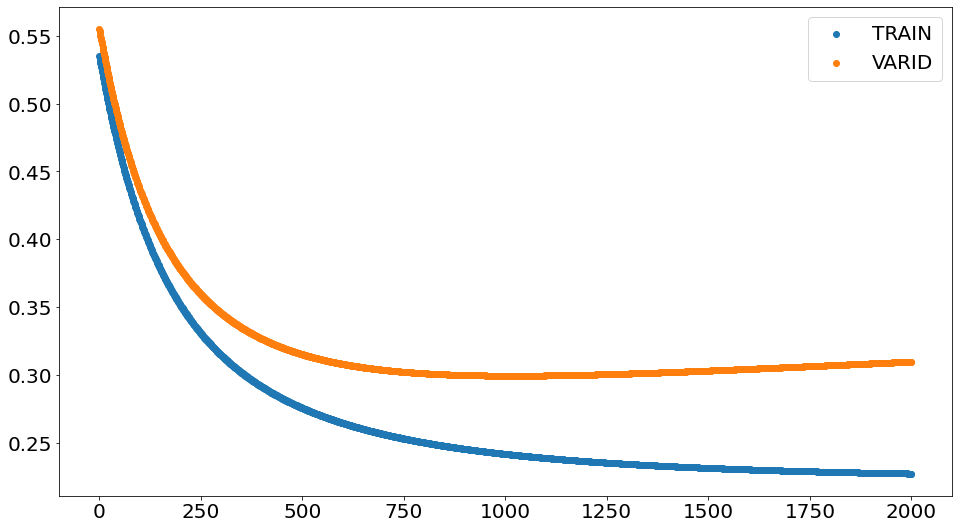

In [39]:
# 学習曲線のプロット
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(range(len(clf.loss)),clf.loss,label='TRAIN')
plt.scatter(range(len(clf.val_loss)),clf.val_loss,label='VARID')
plt.legend();

## 【問題7】決定領域の可視化
決定領域を可視化してください。

In [40]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X,y,model,step=0.01,
                    title='decision region',
                    xlabel='xlabel',
                    ylabel='ylabel',
                    target_names=['versicolor', 'virginica']):
    
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

- スクラッチ実装したモデルで分類

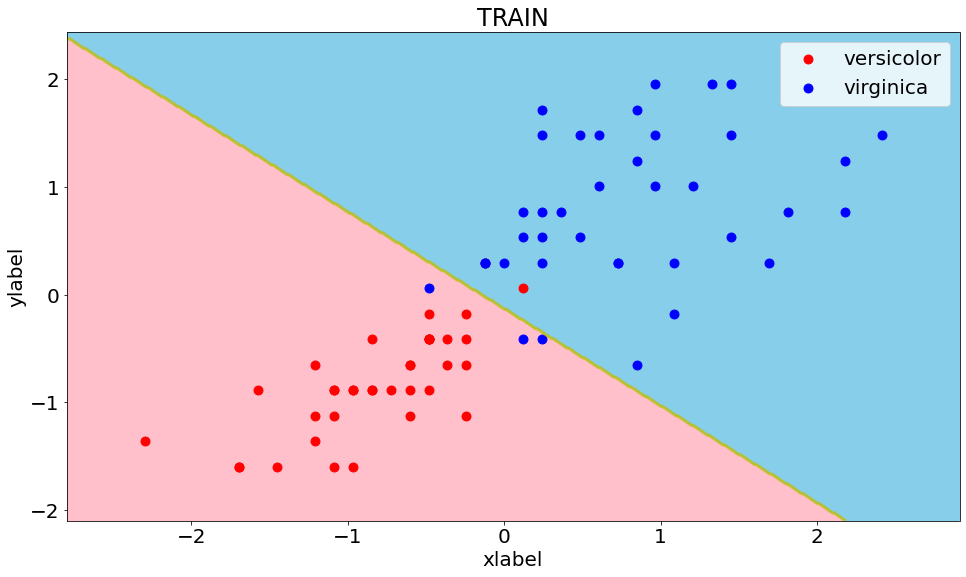

In [41]:
fit,ax = plt.subplots(figsize=(16,9))
decision_region(X_train_std,y_train,clf,title='TRAIN');

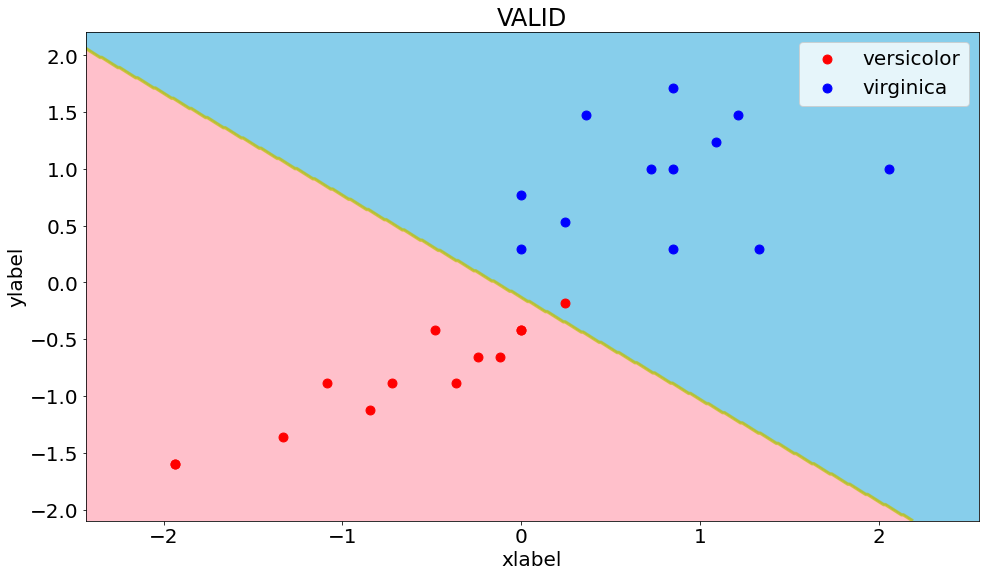

In [42]:
fit,ax = plt.subplots(figsize=(16,9))
decision_region(X_valid_std,y_valid,clf,title='VALID')

- sklearnのロジスティック回帰で分類

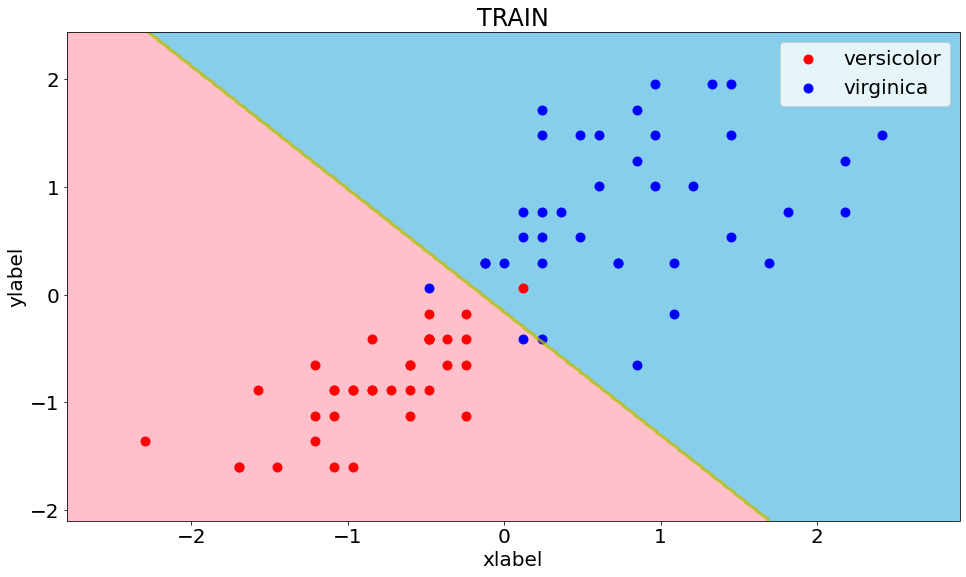

In [43]:
fit,ax = plt.subplots(figsize=(16,9))
decision_region(X_train_std,y_train,clf2,title='TRAIN')

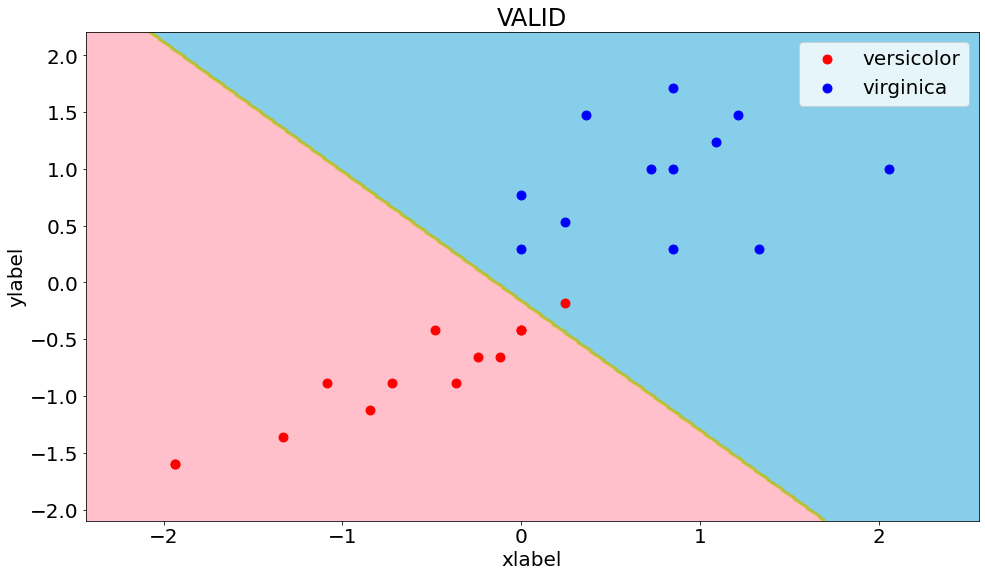

In [44]:
fit,ax = plt.subplots(figsize=(16,9))
decision_region(X_valid_std,y_valid,clf2,title='VALID')

## 【問題8】（アドバンス課題）重みの保存
検証が容易になるように、学習した重みを保存および読み込みができるようにしましょう。pickleモジュールやNumPyのnp.savezを利用します。

In [45]:
np.load('theta.npy')

array([0.21016948, 1.47337685, 1.63771031])